# CREDIT CARD FRAUD DETECTION
The aim of this task is to detect fraudulent credit card transactions

## Importing necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,roc_auc_score, roc_curve, auc, precision_recall_curve
import pickle
from hmmlearn import hmm
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Loading, describing and filtering data

In [2]:
credit_card_train = pd.read_csv(r"C:\Users\HP\Downloads\fraudTrain.csv\fraudTrain.csv") # loading the train dataset into jupyter
credit_card_test = pd.read_csv(r"C:\Users\HP\Downloads\fraudTest.csv (1)\fraudTest.csv") # loading the test dataset into jupyter
credit_card_train.head() # display top 5 rows

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
credit_card_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
credit_card_train.info() # summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
credit_card_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [6]:
credit_card_train[credit_card_train.is_fraud==1].describe() # statistical summary of frauded customers

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,7.506000e+03,7.506000e+03,7506.000000,7506.000000,7506.000000,7506.000000,7.506000e+03,7.506000e+03,7506.000000,7506.000000,7506.0
mean,6.249497e+05,4.003577e+17,531.320092,48038.714229,38.663609,-89.916041,9.727676e+04,1.348389e+09,38.653901,-89.915808,1.0
std,4.010560e+05,1.276871e+18,390.560070,27265.558212,5.172289,14.278221,3.265815e+05,1.383020e+07,5.218387,14.298685,0.0
min,2.449000e+03,6.041621e+10,1.060000,1330.000000,20.027100,-165.672300,2.300000e+01,1.325466e+09,19.425114,-166.550779,1.0
25%,2.398565e+05,1.800429e+14,245.662500,24927.000000,35.056100,-96.701000,7.465000e+02,1.335744e+09,35.114671,-96.671038,1.0
50%,6.381620e+05,3.528041e+15,396.505000,46290.000000,39.433600,-86.691900,2.623000e+03,1.348872e+09,39.427008,-86.813044,1.0
75%,9.849215e+05,4.651007e+15,900.875000,71107.000000,42.073175,-79.941600,2.143700e+04,1.360021e+09,41.986902,-79.907096,1.0
max,1.295733e+06,4.992346e+18,1376.040000,99783.000000,66.693300,-68.556500,2.906700e+06,1.371787e+09,67.510267,-67.569238,1.0


In [7]:
credit_card_train[credit_card_train.is_fraud==0].describe() # statistical summary of other customers

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1289169.0
mean,6.484732e+05,4.172901e+17,6.766711e+01,4.880511e+04,3.853689e+01,-9.022814e+01,8.877523e+04,1.349249e+09,3.853666e+01,-9.022827e+01,0.0
std,3.741526e+05,1.308990e+18,1.540080e+02,2.689099e+04,5.075234e+00,1.375598e+01,3.018065e+05,1.283514e+07,5.109144e+00,1.376794e+01,0.0
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.0
25%,3.246100e+05,1.800429e+14,9.610000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338759e+09,3.473145e+01,-9.689853e+01,0.0
50%,6.484110e+05,3.521417e+15,4.728000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349254e+09,3.936528e+01,-8.744091e+01,0.0
75%,9.723990e+05,4.642255e+15,8.254000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359378e+09,4.195705e+01,-8.023853e+01,0.0
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.568990e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.668291e+01,-6.695090e+01,0.0


In [8]:
credit_card_train.describe(include="object") # summary of categorical data

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675
unique,1274791,693,14,352,481,2,983,894,51,494,968,1296675
top,2019-04-22 16:02:01,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,0069 Robin Brooks Apt. 695,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9
freq,4,4403,131659,26669,28794,709863,3123,5617,94876,9779,5636,1


In [9]:
# number of frauded and other customers
frauded_customers = credit_card_train[credit_card_train.is_fraud == 1].shape[0]
other_customers = credit_card_train[credit_card_train.is_fraud == 0].shape[0]

# percentage of frauded customers
percent_frauded = frauded_customers/(frauded_customers+other_customers)*100
print(f"{percent_frauded:.2f}% percent of the customers were frauded")

# percentage of other customers
percent_other = other_customers/(frauded_customers+other_customers)*100
print(f"{percent_other:.2f}% percent of the customers were not frauded")

0.58% percent of the customers were frauded
99.42% percent of the customers were not frauded


In [10]:
credit_card_train.columns # displays all columns in dataframe
credit_card_test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [11]:
credit_card_train["dob"]

0          1988-03-09
1          1978-06-21
2          1962-01-19
3          1967-01-12
4          1986-03-28
              ...    
1296670    1961-11-24
1296671    1979-12-11
1296672    1967-08-30
1296673    1980-08-18
1296674    1995-08-16
Name: dob, Length: 1296675, dtype: object

In [12]:
print(credit_card_train['dob'].dtype)

object


In [13]:
# Convert 'dob' column to datetime
credit_card_train['dob'] = pd.to_datetime(credit_card_train['dob'], format='%Y-%m-%d', errors='coerce')

# Check if the conversion was successful
print(credit_card_train['dob'].dtype)
print(credit_card_train['dob'].head())

datetime64[ns]
0   1988-03-09
1   1978-06-21
2   1962-01-19
3   1967-01-12
4   1986-03-28
Name: dob, dtype: datetime64[ns]


In [14]:
# using the date of birth column to calculate the customers age which might be a key feature for prediction
def calculate_age(dob):
    today = pd.Timestamp.now()
    if pd.isna(dob):
        return None
    age = today.year - dob.year
    if (today.month, today.day) < (dob.month, dob.day):
        age -= 1
    return age

# creates a new column in dataframe which contains customers age
credit_card_train['age'] = credit_card_train['dob'].apply(calculate_age)

In [15]:
# filters unwanted columns 
credit_card_train = credit_card_train[["category","amt","gender","city","state","lat","long","job","is_fraud","age"]]
credit_card_train.head()

,category,amt,gender,city,state,lat,long,job,is_fraud,age
0,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,"Psychologist, counselling",0,36
1,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,Special educational needs teacher,0,46
2,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,Nature conservation officer,0,62
3,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,Patent attorney,0,57
4,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,Dance movement psychotherapist,0,38


In [16]:
# Convert 'dob' column to datetime
credit_card_test['dob'] = pd.to_datetime(credit_card_test['dob'], format='%Y-%m-%d', errors='coerce')
# Check if the conversion was successful
print(credit_card_test['dob'].dtype)
print(credit_card_test['dob'].head())

# creates a new column in dataframe which contains customers age
credit_card_test['age'] = credit_card_test['dob'].apply(calculate_age)

datetime64[ns]
0   1968-03-19
1   1990-01-17
2   1970-10-21
3   1987-07-25
4   1955-07-06
Name: dob, dtype: datetime64[ns]


In [17]:
# filters unwanted columns 
credit_card_test = credit_card_test[["category","amt","gender","city","state","lat","long","job","is_fraud","age"]]
credit_card_test.head()

,category,amt,gender,city,state,lat,long,job,is_fraud,age
0,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,Mechanical engineer,0,56
1,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,"Sales professional, IT",0,34
2,health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,"Librarian, public",0,53
3,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,Set designer,0,37
4,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,Furniture designer,0,69


<Axes: xlabel='gender', ylabel='count'>

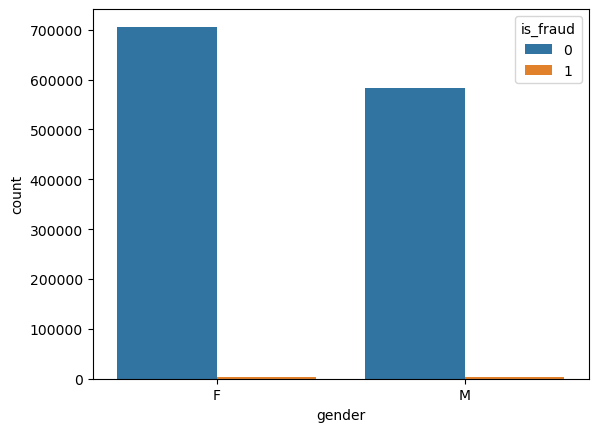

In [18]:
sns.countplot(data=credit_card_train,x="gender",hue="is_fraud") # plots a bar chart for gender splitting the bars by fraud status

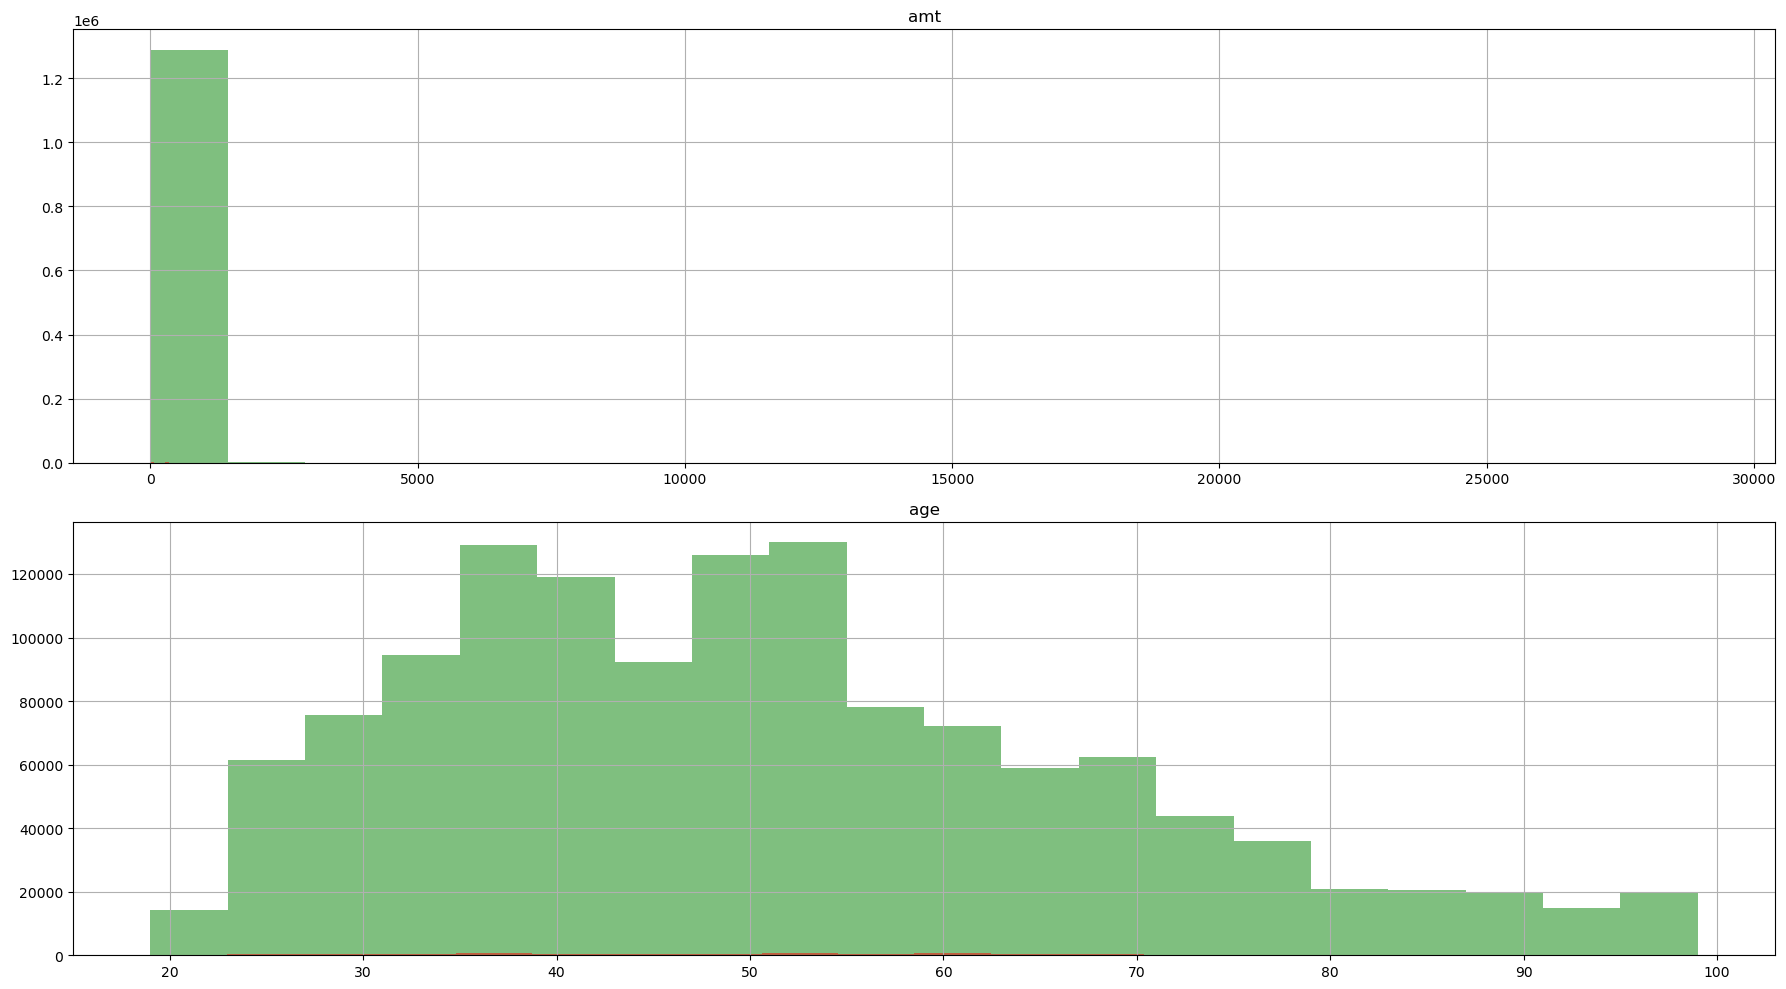

In [19]:
# assigns numerical data to a variable
num_feats = ["amt","age"]
# Creates a figure with multiple subplots
fig, ax = plt.subplots(2, 1, figsize=(18,10))

# Flattens the ax array for easy indexing
ax = ax.flatten()

# plots histogram for is_fraud == 0
credit_card_train[credit_card_train.is_fraud == 0][num_feats].hist(bins=20, color="green", alpha=0.5, ax=ax[:len(num_feats)])

# plots histogram for is_fraud ==1
credit_card_train[credit_card_train.is_fraud == 1][num_feats].hist(bins=20, color="red", alpha=0.5, ax=ax[:len(num_feats)])

plt.tight_layout()
plt.show()

## Data preprocessing

In [20]:
# Filters the DataFrame to get only the rows where 'is_fraud' is 0 (Legit transactions)
Legit = credit_card_train[credit_card_train.is_fraud == 0]

# Filters the DataFrame to get only the rows where 'is_fraud' is 1 (Fraudulent transactions)
Fraud = credit_card_train[credit_card_train.is_fraud == 1]

# Print the shapes of the two DataFrames
print(Legit.shape, Fraud.shape)


(1289169, 10) (7506, 10)


In [21]:
# Upsamples the minority class (fraudulent transactions) to have 100,000 samples
minority_data_upsampling = resample(Fraud, n_samples=100000, random_state=1)    

# Creates a new dataset by concatenating a subset of the legit transactions with the upsampled minority class 
# by taking the first 100,000 rows from the 'Legit' DataFrame to balance with the upsampled 'Fraud' DataFrame
new_dataset = pd.concat([Legit[:100000], minority_data_upsampling])

# The new dataset is now balanced with 100,000 legit transactions and 100,000 fraudulent transactions
new_dataset.head() # displyas top 5 rows of new dataset

,category,amt,gender,city,state,lat,long,job,is_fraud,age
0,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,"Psychologist, counselling",0,36
1,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,Special educational needs teacher,0,46
2,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,Nature conservation officer,0,62
3,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,Patent attorney,0,57
4,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,Dance movement psychotherapist,0,38


In [22]:
new_dataset[["amt","age"]].describe()

,amt,age
count,200000.000000,200000.000000
mean,299.806302,51.716020
std,373.612286,18.151409
min,1.000000,19.000000
25%,20.250000,37.000000
50%,88.960000,50.000000
75%,490.127500,63.000000
max,12788.070000,99.000000


In [23]:
# Counts the number of frauded customers in the new dataset
frauded_customers = new_dataset[new_dataset.is_fraud == 1].shape[0]

# Counts the number of non-frauded (other) customers in the new dataset
other_customers = new_dataset[new_dataset.is_fraud == 0].shape[0]

# Calculates the total number of customers
total_customers = frauded_customers + other_customers

# Calculates and prints the percentage of frauded customers
print(frauded_customers / total_customers * 100, "percent of the frauded customers")

# Calculates and prints the percentage of other (non-frauded) customers
print(other_customers / total_customers * 100, "percent of the other customers")

50.0 percent of the customers were frauded
50.0 percent of the customers were not frauded


<Axes: xlabel='gender', ylabel='count'>

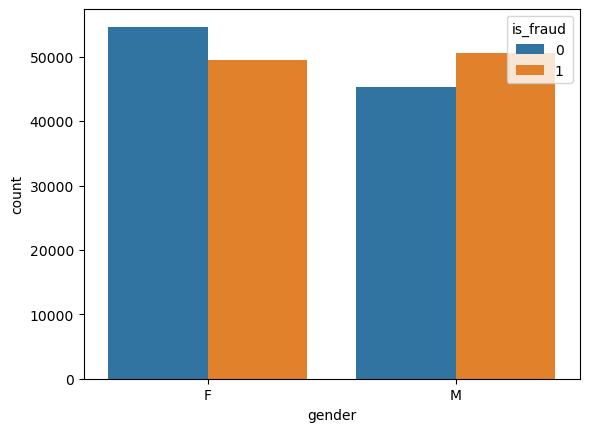

In [24]:
sns.countplot(data=new_dataset,x="gender",hue="is_fraud") # plots a bar chart for gender splitting the bars by fraud status

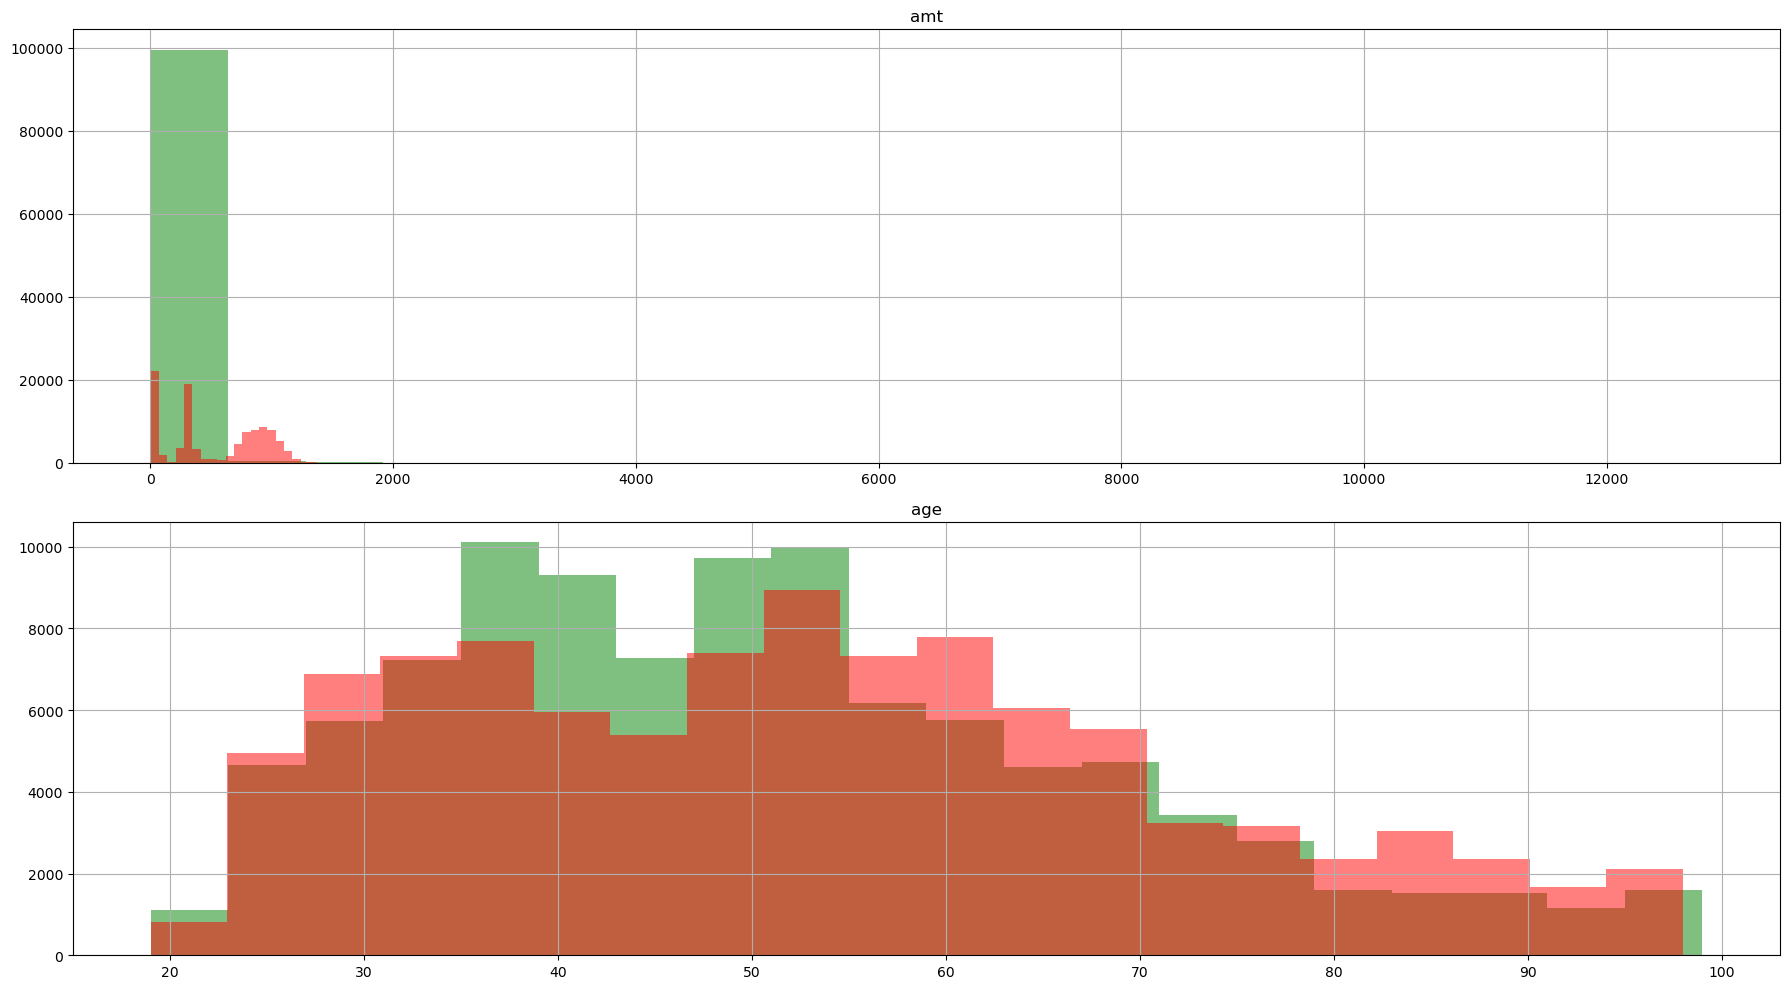

In [25]:
# List of numerical features to plot
num_feats = ["amt","age"]

# Create a figure with multiple subplots (2 rows, 1 column) and set the figure size
fig, ax = plt.subplots(2, 1, figsize=(18,10))

# Flattens the 2x1 array of axes into a 1D array for easier indexing
ax = ax.flatten()

# Plots histogram for non-fraudulent transactions
new_dataset[new_dataset.is_fraud == 0][num_feats].hist(bins=20, color="green", alpha=0.5, ax=ax[:len(num_feats)])

# Plot histograms for fraudulent transactions
new_dataset[new_dataset.is_fraud == 1][num_feats].hist(bins=20, color="red", alpha=0.5, ax=ax[:len(num_feats)])

plt.tight_layout()
plt.show()

In [26]:
new_dataset["category"].unique() # Displays unique values in the 'category' column

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [27]:
# Initializes LabelEncoder for the categorical columns,
#Fits the encoder to the unique values of the 'category' column and 
#Transforms the columns to numeric labels and store them in a new column
# Train data
le1 = LabelEncoder()
cat_le1 = le1.fit(new_dataset["category"])
new_dataset["category_le"] = le1.transform(new_dataset["category"])

le2 = LabelEncoder()
gen_le2 = le2.fit(new_dataset["gender"])
new_dataset["gender_le"] = le2.transform(new_dataset["gender"])

le3 = LabelEncoder()
state_le3 = le3.fit(new_dataset["state"])
new_dataset["state_le"]= le3.transform(new_dataset["state"])

le4 = LabelEncoder()
city_le4 = le4.fit(new_dataset["city"])
new_dataset["city_le"] = le4.transform(new_dataset["city"])

le5 = LabelEncoder()
job_le5 = le5.fit(new_dataset["job"])
new_dataset["job_le"] = le5.transform(new_dataset["job"])

In [28]:
# test data
le1 = LabelEncoder()
cat_le1 = le1.fit(credit_card_test["category"])
credit_card_test["category_le"] = le1.transform(credit_card_test["category"])

le2 = LabelEncoder()
gen_le2 = le2.fit(credit_card_test["gender"])
credit_card_test["gender_le"] = le2.transform(credit_card_test["gender"])

le3 = LabelEncoder()
state_le3 = le3.fit(credit_card_test["state"])
credit_card_test["state_le"]= le3.transform(credit_card_test["state"])

le4 = LabelEncoder()
city_le4 = le4.fit(credit_card_test["city"])
credit_card_test["city_le"] = le4.transform(credit_card_test["city"])

le5 = LabelEncoder()
job_le5 = le5.fit(credit_card_test["job"])
credit_card_test["job_le"] = le5.transform(credit_card_test["job"])

In [29]:
new_dataset

,category,amt,gender,city,state,lat,long,job,is_fraud,age,category_le,gender_le,state_le,city_le,job_le
0,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,"Psychologist, counselling",0,36,8,0,27,526,370
1,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,Special educational needs teacher,0,46,4,0,47,612,428
2,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,Nature conservation officer,0,62,0,1,13,468,307
3,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,Patent attorney,0,57,2,1,26,84,328
4,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,Dance movement psychotherapist,0,38,9,1,45,216,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239711,food_dining,119.42,M,Tamaroa,IL,38.1380,-89.2231,"Development worker, community",1,63,1,1,14,791,130
100422,misc_pos,8.66,M,Clarinda,IA,40.7491,-95.0380,IT trainer,1,34,9,1,12,146,239
1292903,shopping_net,1060.31,F,Henderson,WV,38.8265,-82.1364,Building services engineer,1,77,11,0,49,343,54
1051037,grocery_pos,347.52,M,Ferney,SD,45.3290,-98.0837,Bookseller,1,34,4,1,41,265,49


In [30]:
credit_card_test

,category,amt,gender,city,state,lat,long,job,is_fraud,age,category_le,gender_le,state_le,city_le,job_le
0,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,Mechanical engineer,0,56,10,1,39,157,275
1,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,"Sales professional, IT",0,34,10,0,43,16,392
2,health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,"Librarian, public",0,53,5,0,33,61,259
3,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,Set designer,0,37,9,1,8,764,407
4,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,Furniture designer,0,69,13,1,21,247,196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,health_fitness,43.77,M,Luray,MO,40.4931,-91.8912,Town planner,0,58,5,1,23,443,460
555715,kids_pets,111.84,M,Lake Jackson,TX,29.0393,-95.4401,Futures trader,0,24,7,1,42,401,198
555716,kids_pets,86.88,F,Burbank,WA,46.1966,-118.9017,Musician,0,42,7,0,46,104,294
555717,travel,7.99,M,Mesa,ID,44.6255,-116.4493,Cartographer,0,58,13,1,12,476,58


In [31]:
filtered_data = new_dataset.drop(columns=["category","gender","city","state","job"],axis=1) # Drops specified columns from the 'new_dataset' DataFrame

In [32]:
credit_card_test = credit_card_test.drop(columns=["category","gender","city","state","job"],axis=1) # Drops specified columns from the 'credit_card_test' DataFrame

## Data Splitting

In [33]:
# Defines the feature set X by dropping the 'is_fraud' column from the 'filtered_data' DataFrame
X = filtered_data.drop(columns = "is_fraud",axis=1)
# Defines the target variable y by selecting the 'is_fraud' column from the 'filtered_data' DataFrame
y = filtered_data["is_fraud"]

In [34]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Defines the feature set X by dropping the 'is_fraud' column from the 'credit_card_test' DataFrame
X_test = credit_card_test.drop(columns = "is_fraud",axis=1)
# Defines the target variable y by selecting the 'is_fraud' column from the 'credit_card_test' DataFrame
y_test = credit_card_test["is_fraud"]

In [36]:
X_train.shape

(160000, 9)

In [37]:
y_train.shape

(160000,)

In [38]:
X_val.shape

(40000, 9)

In [39]:
y_val.shape

(40000,)

## Model Training

In [40]:
# Initializes the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=1)
# Trains the RandomForestClassifier using the training data
model.fit(X_train,y_train)
# Use the trained model to make predictions on the test and validation data
y_pred_val =model.predict(X_val)
y_pred = model.predict(X_test)

## Model Evaluation on Validation Data

In [41]:
predlist = list(zip(y_pred_val,y_val))
predlist

[(1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 

In [43]:
# Calculates precision, recall, F1 score, ROC AUC,and PR AUC
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)
roc_auc = roc_auc_score(y_val, y_pred_val)
precision_vals, recall_vals, _ = precision_recall_curve(y_val, y_pred_val)
pr_auc = auc(recall_vals, precision_vals)
accuracy_val = accuracy_score(y_val,y_pred_val)
print(f"Accuracy score: {accuracy_val:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"PR AUC: {pr_auc:.2f}")

Accuracy score: 1.00
Precision: 0.99
Recall: 1.00
F1 Score: 1.00
ROC AUC: 1.00
PR AUC: 1.00


In [44]:
conf_matrix =confusion_matrix(y_val,y_pred_val)
conf_matrix

array([[19823,   170],
       [    0, 20007]], dtype=int64)

## Metrics Visualizations

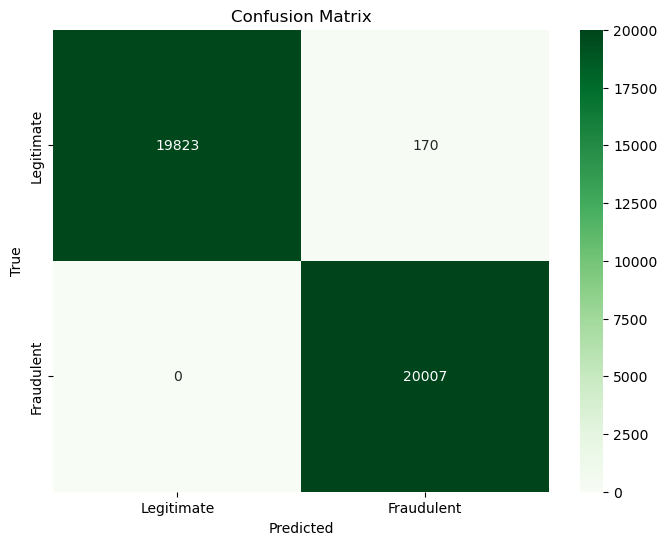

In [45]:
# Creates a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

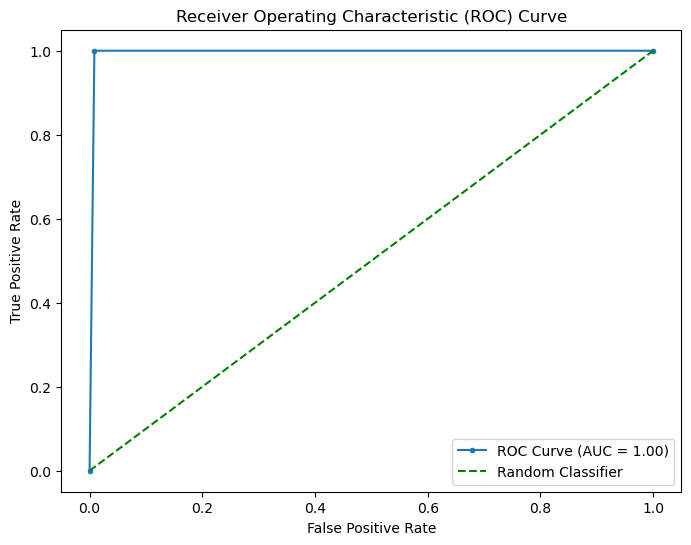

In [46]:
# Plots the ROC curve
fpr, tpr, _ = roc_curve(y_val, y_pred_val)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--',color='green', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

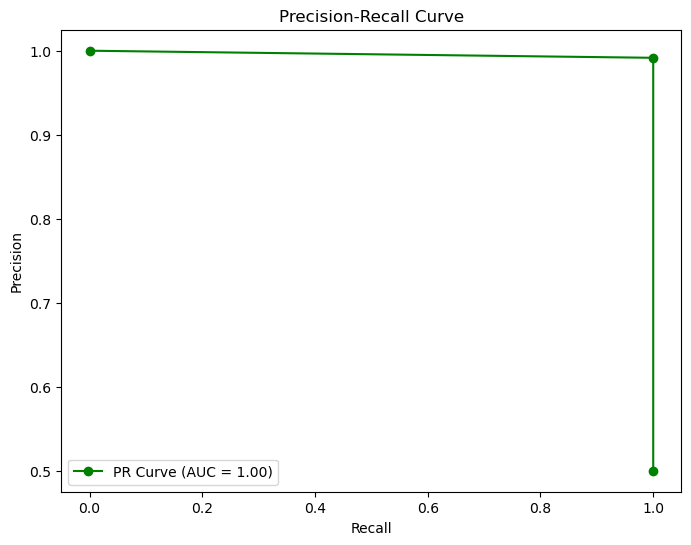

In [47]:
# Plots the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='green', marker='o', label='PR Curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## Model Evaluation on Test Data

In [48]:
predlist = list(zip(y_pred,y_test))
predlist

[(0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 

In [49]:
# Calculates precision, recall, F1 score, ROC AUC,and PR AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall_vals, precision_vals)
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy_test:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"PR AUC: {pr_auc:.2f}")

Accuracy score: 0.99
Precision: 0.30
Recall: 0.83
F1 Score: 0.44
ROC AUC: 0.91
PR AUC: 0.56


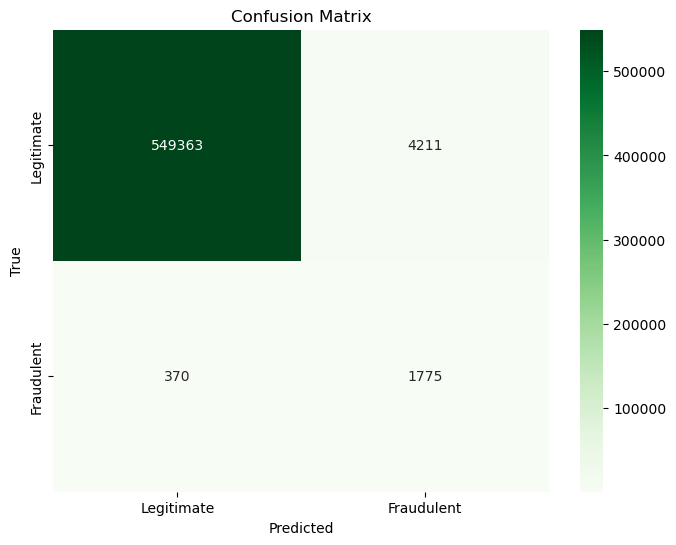

In [50]:
conf_matrix =confusion_matrix(y_test,y_pred)
# Creates a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

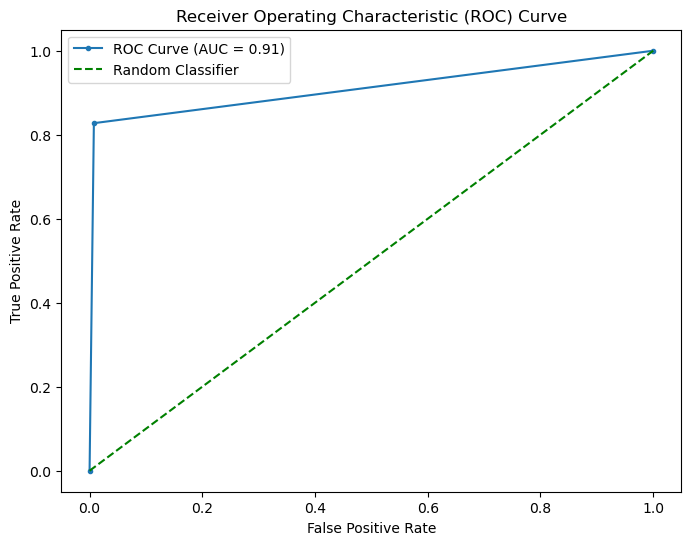

In [51]:
# Plots the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--',color='green', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

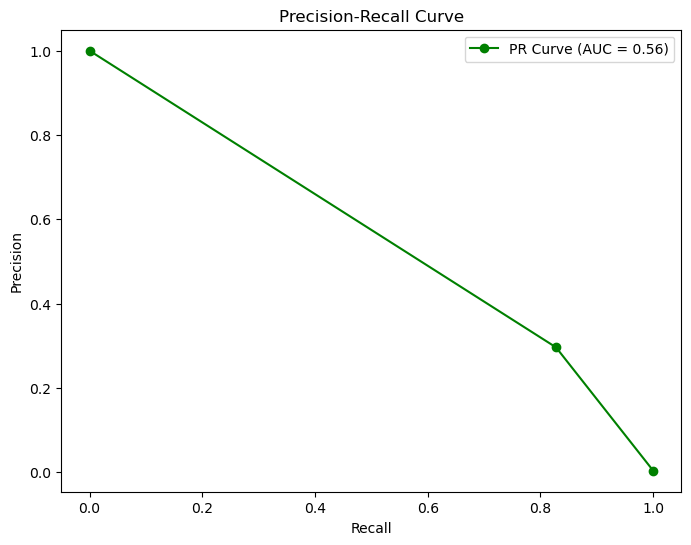

In [52]:
# Plots the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='green', marker='o', label='PR Curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()